In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# import all libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import cohen_kappa_score, confusion_matrix


In [3]:
# read data
df1 = pd.read_csv("churn-bigml-80.csv")
df2 = pd.read_csv("churn-bigml-20.csv")
#contact two files
dataset = pd.concat([df1,df2],ignore_index=True)

In [4]:
dataset

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

### we notice that no missing value.
### we notice that we will convert datatype(object, bool )

In [6]:
dataset.describe()

Account length    Area code  Number vmail messages  Total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       Total day calls  Total day charge  Total eve minutes  Total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       Total eve charge  Total night minutes  Total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       Total night charge  Total intl minutes  Total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       Total intl charge  Customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

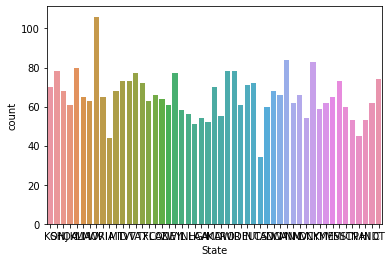

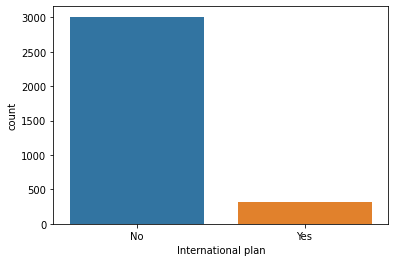

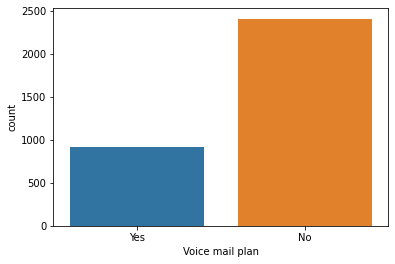

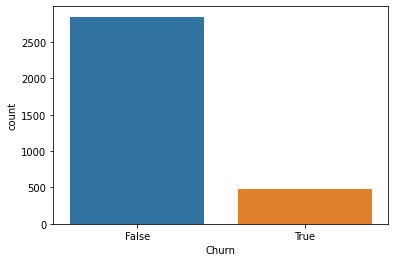

In [7]:
column = list(dataset.select_dtypes(include=['bool',
                                            'object']))     
for x in column:
    sns.countplot(dataset[x])
    plt.show()

### Through our reading of the graph we notice that data imbalance

In [8]:
dataset['State'].unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'WV', 'RI', 'IA', 'MT',
       'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'NE', 'WY', 'IL', 'NH',
       'LA', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR', 'DE', 'IN', 'UT', 'CA',
       'SD', 'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'NY', 'KY', 'ME', 'MS',
       'MI', 'SC', 'TN', 'PA', 'HI', 'ND', 'CT'], dtype=object)

In [9]:
dataset['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OR     78
WI     78
OH     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
MT     68
NJ     68
NC     68
CO     66
NV     66
WA     66
MA     65
RI     65
MS     65
AZ     64
MO     63
FL     63
ND     62
NM     62
ME     62
NE     61
DE     61
OK     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
TN     53
HI     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

### i see that column state doesn't affect to the dataset so i will drop it.

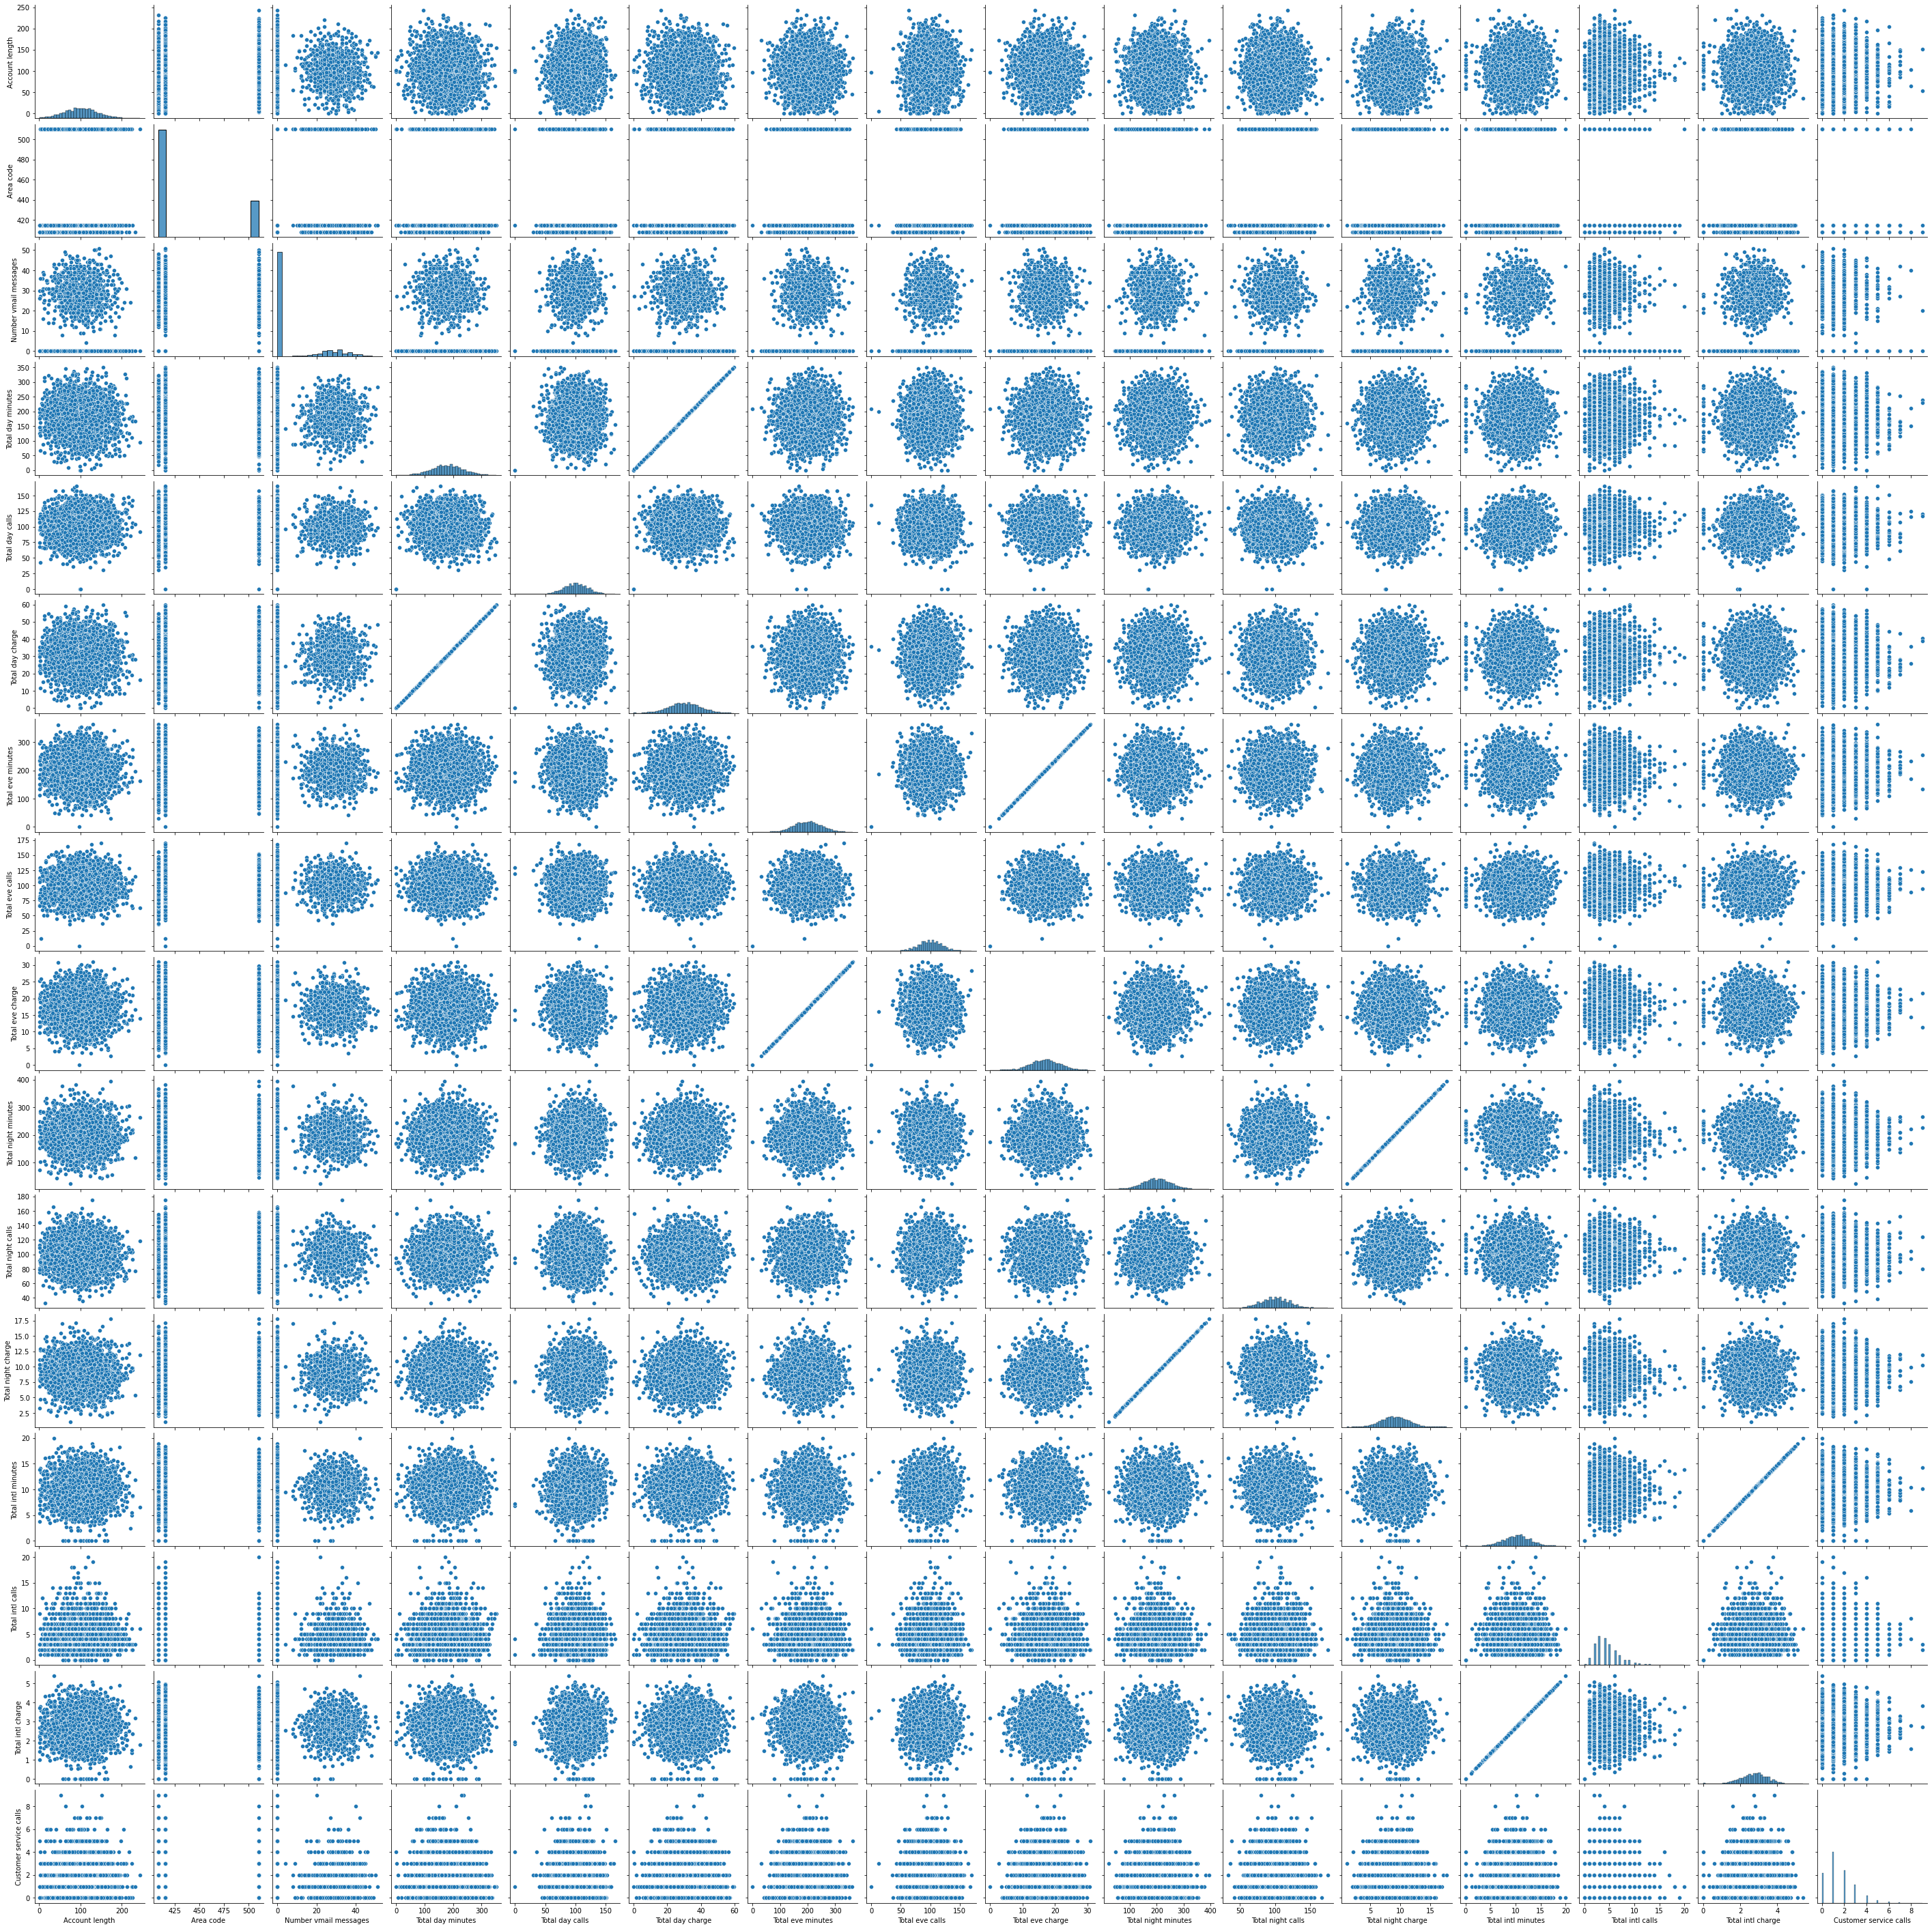

In [10]:
sns.pairplot(dataset.select_dtypes(include=['float64',
                                            'int64']))

<AxesSubplot:>

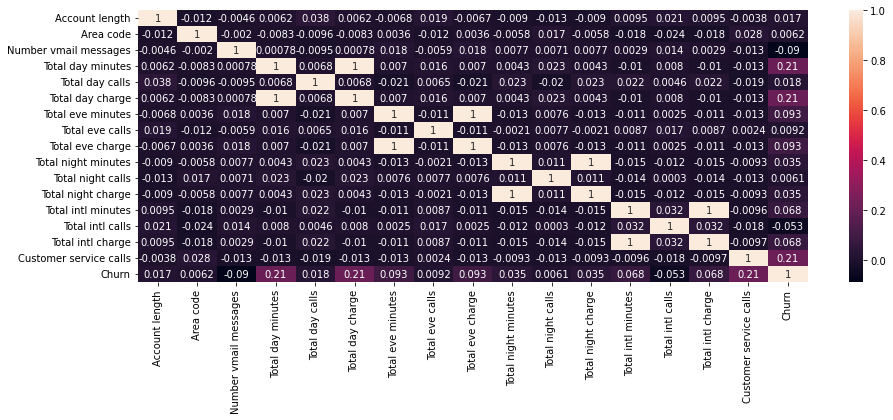

In [11]:
plt.figure(1, figsize=(15,5))
sns.heatmap(dataset.corr(), annot=True)

Text(0.5, 1.0, 'Churn VS Account length')

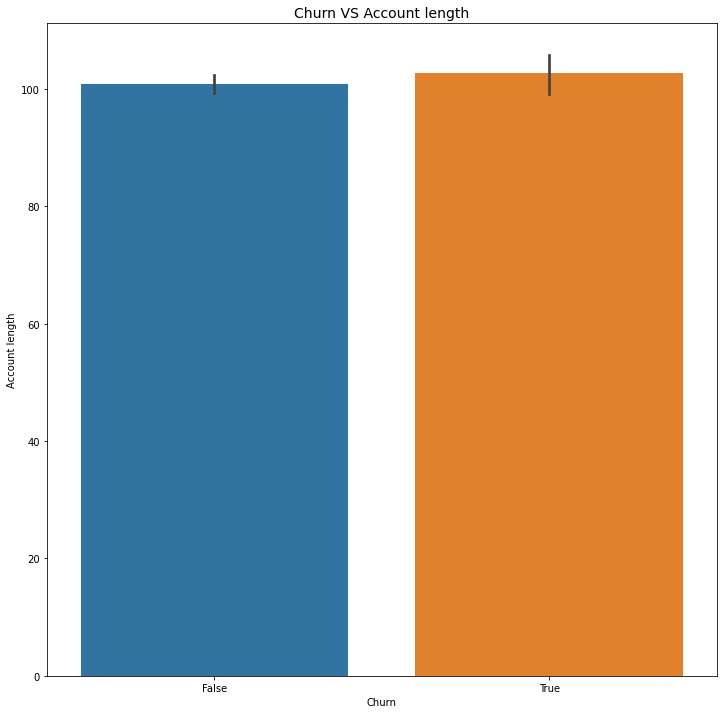

In [12]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=dataset['Churn'], y=dataset['Account length'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Churn VS Account length', fontsize=14)

Text(0.5, 1.0, 'Churn VS Total day minutes')

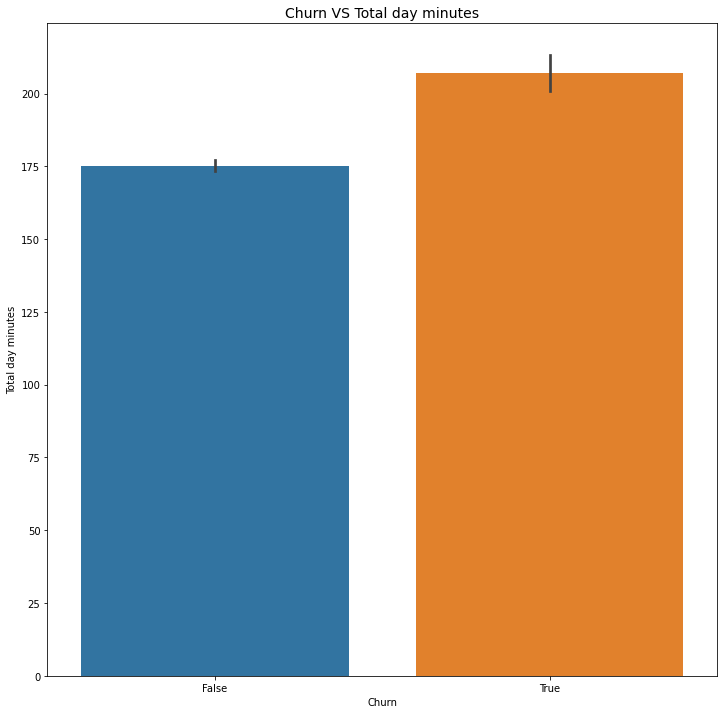

In [13]:
plt.figure(figsize=(12,12))
ax = sns.barplot(x=dataset['Churn'], y=dataset['Total day minutes'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_title('Churn VS Total day minutes', fontsize=14)

### Many of the features are related to each other in a linear relationship so we will delete it 

In [14]:
# delete columns that doesn't affect on algorithm
data_clean = dataset.drop(['State','Total day charge','Total intl charge','Total night charge','Total eve charge'], axis=1)

In [15]:
dataset.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [16]:
data_clean.columns

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total eve minutes', 'Total eve calls', 'Total night minutes',
       'Total night calls', 'Total intl minutes', 'Total intl calls',
       'Customer service calls', 'Churn'],
      dtype='object')

In [17]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   object 
 3   Voice mail plan         3333 non-null   object 
 4   Number vmail messages   3333 non-null   int64  
 5   Total day minutes       3333 non-null   float64
 6   Total day calls         3333 non-null   int64  
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total night minutes     3333 non-null   float64
 10  Total night calls       3333 non-null   int64  
 11  Total intl minutes      3333 non-null   float64
 12  Total intl calls        3333 non-null   int64  
 13  Customer service calls  3333 non-null   int64  
 14  Churn                   3333 non-null   

In [18]:
#dummy categorical data
data_clean['International plan']=data_clean['International plan'].replace(['No','Yes'],[0,1])
data_clean['Voice mail plan']=data_clean['Voice mail plan'].replace(['No','Yes'],[0,1])
data_clean['Churn']=data_clean['Churn'].replace([False,True],[0,1])

#we can use dummy variable from pandas


In [19]:
data_clean

Account length  Area code  International plan  Voice mail plan  \
0                128        415                   0                1   
1                107        415                   0                1   
2                137        415                   0                0   
3                 84        408                   1                0   
4                 75        415                   1                0   
...              ...        ...                 ...              ...   
3328             114        415                   0                1   
3329             106        408                   0                1   
3330              60        415                   0                0   
3331             159        415                   0                0   
3332             184        510                   1                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total eve minutes  Total eve calls  Total night minutes  \
0                 197.4               99                244.7   
1                 195.5              103                254.4   
2                 121.2              110                162.6   
3                  61.9               88                196.9   
4                 148.3              122                186.9   
...                 ...              ...                  ...   
3328              155.7              125                247.6   
3329              203.9              131                229.5   
3330               85.0              110                210.1   
3331              197.7              105                193.7   
3332              159.6               84                139.2   

      Total night calls  Total intl minutes  Total intl calls  \
0                    91                10.0                 3   
1                   103                13.7                 3   
2                   104                12.2                 5   
3                    89                 6.6                 7   
4                   121                10.1                 3   
...                 ...                 ...               ...   
3328                 94                11.5                 7   
3329                 73                 8.1                 3   
3330                134                13.2                 8   
3331                 82                11.6                 4   
3332                137                 5.0                10   

      Customer service calls  Churn  
0                          1      0  
1                          1      0  
2                          0      0  
3                          2      0  
4                          3      0  
...                      ...    ...  
3328                       2      0  
3329                       1      0  
3330                       3      0  
3331                       1      0  
3332                       2      0  

[3333 rows x 15 columns]

In [20]:
#prepare data 
target = data_clean.iloc[: , -1].values
feature = data_clean.iloc[: , : -1].values

In [21]:
target.reshape(-1,1)

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.20,random_state=101)

## Decision Trees

We'll start just by training a single decision tree.

In [23]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [24]:
acc                 = accuracy_score(y_test, predictions)
classReport         = classification_report(y_test, predictions)
confMatrix          = confusion_matrix(y_test, predictions) 
kappa_score         = cohen_kappa_score(y_test, predictions)         
        
print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.9175412293853074

Kappa Score :  0.6725576828669613

Confusion Matrix :
 [[541  32]
 [ 23  71]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       573
           1       0.69      0.76      0.72        94

    accuracy                           0.92       667
   macro avg       0.82      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667



In [25]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       573
           1       0.69      0.76      0.72        94

    accuracy                           0.92       667
   macro avg       0.82      0.85      0.84       667
weighted avg       0.92      0.92      0.92       667



In [26]:
print(confusion_matrix(y_test,predictions))

[[541  32]
 [ 23  71]]


## Random Forests

Now let's compare the decision tree model to a random forest.

In [27]:
model = RandomForestClassifier(n_estimators=100, criterion='gini', 
                                max_depth=8, min_samples_split=2, 
                                min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                max_features=None, max_leaf_nodes=None, 
                                min_impurity_decrease=0.0, 
                                bootstrap=True, oob_score=False, 
                                warm_start=False, class_weight=None)




## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [28]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)
predictions = rfc.predict(X_test)

In [29]:
acc                 = accuracy_score(y_test, predictions)
classReport         = classification_report(y_test, predictions)
confMatrix          = confusion_matrix(y_test, predictions) 
kappa_score         = cohen_kappa_score(y_test, predictions)         
        
print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.9550224887556222

Kappa Score :  0.7980868196403705

Confusion Matrix :
 [[567   6]
 [ 24  70]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       573
           1       0.92      0.74      0.82        94

    accuracy                           0.96       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667



In [30]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       573
           1       0.92      0.74      0.82        94

    accuracy                           0.96       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667

[[567   6]
 [ 24  70]]


# Gridsearch

Finding the right parameters (like what C or gamma values to use) is a tricky task! But luckily, we can be a little lazy and just try a bunch of combinations and see what works best! This idea of creating a 'grid' of parameters and just trying out all the possible combinations is called a Gridsearch, this method is common enough that Scikit-learn has this functionality built in with GridSearchCV! The CV stands for cross-validation which is the

GridSearchCV takes a dictionary that describes the parameters that should be tried and a model to train. The grid of parameters is defined as a dictionary, where the keys are the parameters and the values are the settings to be tested. 

In [31]:
# parameters
parameters = {'max_depth'    : [6,10],
             'criterion'     : ['gini', 'entropy'],
             'max_features'  : ['auto', 'sqrt', 'log2'],
             'n_estimators'  : [50,100]
# Add more parameters here for tuning
              }
grid = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, 
                    verbose = 1, n_jobs = -1, refit = True)
grid.fit(X_train, y_train)

# Results from Grid Search
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")

Fitting 2 folds for each of 24 candidates, totalling 48 fits

 Results from Grid Search 

 The best estimator across ALL searched params:
 RandomForestClassifier(max_depth=10, max_features='log2', n_estimators=50)

 The best score across ALL searched params:
 0.9234808702175543

 The best parameters across ALL searched params:
 {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'n_estimators': 50}



In [32]:
cv_results = cross_val_score(model, X_train, y_train, cv = 2, scoring = 'accuracy', 
                             n_jobs = -1, verbose = 0)
# Cross Validation Results
#print()
print("Cross Validation results: ", cv_results)
prt_string = "CV Mean Accuracy: %f (Std: %f)"% (cv_results.mean(), cv_results.std())
print(prt_string)
        
# Final fitting of the Model
model.fit(X_train, y_train)
        
print(); print('========================================================')
print(); print(model.get_params(deep = True))
print(); print('========================================================')   

Cross Validation results:  [0.94073518 0.94373593]
CV Mean Accuracy: 0.942236 (Std: 0.001500)


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}



In [33]:
pred_Class          = model.predict(X_test)
acc                 = accuracy_score(y_test, pred_Class)
classReport         = classification_report(y_test, pred_Class)
confMatrix          = confusion_matrix(y_test, pred_Class) 
kappa_score         = cohen_kappa_score(y_test, pred_Class)         
        
print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.9550224887556222

Kappa Score :  0.8000199880071956

Confusion Matrix :
 [[566   7]
 [ 23  71]]

Classification Report :
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       573
           1       0.91      0.76      0.83        94

    accuracy                           0.96       667
   macro avg       0.94      0.87      0.90       667
weighted avg       0.95      0.96      0.95       667



In [45]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
# Add more parameters here for tuning
              
grid = GridSearchCV(SVC(),param_grid, refit=True,verbose = 3)
grid.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.856 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.856 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.854 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.854 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [46]:
print("\n========================================================")
print(" Results from Grid Search " )
print("========================================================")    
print("\n The best estimator across ALL searched params:\n",
        grid.best_estimator_)
print("\n The best score across ALL searched params:\n",
        grid.best_score_)
print("\n The best parameters across ALL searched params:\n",
        grid.best_params_)
print("\n ========================================================")


 Results from Grid Search 

 The best estimator across ALL searched params:
 SVC(C=1, gamma=0.0001)

 The best score across ALL searched params:
 0.8889734454820779

 The best parameters across ALL searched params:
 {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}



In [47]:
pred_Class          = grid.predict(X_test)
acc                 = accuracy_score(y_test, pred_Class)
classReport         = classification_report(y_test, pred_Class)
confMatrix          = confusion_matrix(y_test, pred_Class) 
kappa_score         = cohen_kappa_score(y_test, pred_Class)         
        
print(); print('Evaluation of the trained model: ')
print(); print('Accuracy : ', acc)
print(); print('Kappa Score : ', kappa_score)
print(); print('Confusion Matrix :\n', confMatrix)
print(); print('Classification Report :\n',classReport)


Evaluation of the trained model: 

Accuracy :  0.8860569715142429

Kappa Score :  0.3422432137852286

Confusion Matrix :
 [[567   6]
 [ 70  24]]

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       573
           1       0.80      0.26      0.39        94

    accuracy                           0.89       667
   macro avg       0.85      0.62      0.66       667
weighted avg       0.88      0.89      0.86       667



## concolusion
### the data is imbalance so the recall of algorithm was variance and the algorithm tended to one of the result than other but i prefere gridsearch with Random Forest 


# Great job!